In [73]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing the Iris dataset with pandas
df = pd.read_csv('Iris.csv')

In [74]:
#iloc gets rows (or columns) at particular positions in the index
#x = df.iloc[:, [1, 2, 3, 4]].values
x = df[['sepal_length','sepal_width','petal_length','petal_width']].values

In [75]:
# Check the dimensionality of Dataset
print(x.shape)

(150, 4)


In [76]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

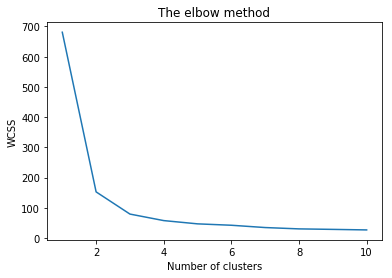

In [77]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [78]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10)
y_kmeans = kmeans.fit_predict(x)

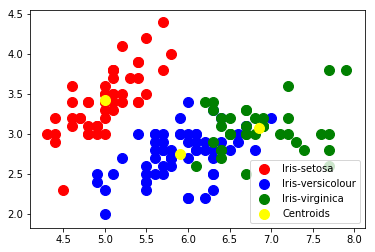

In [79]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()